# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 70 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 50 баллов
* Задача 5 &mdash; 30 балла


### Комментарий: 
     Задачи 1 и 3 описаны на фото.

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [323]:
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов.

**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$.

**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.



*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. Формулами мат. ожидания и дисперсии с занятия пользоваться нельзя, но стоит сверить ответ.
2. **Прочитай требования к формату решения в правилах сдачи задания.**

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

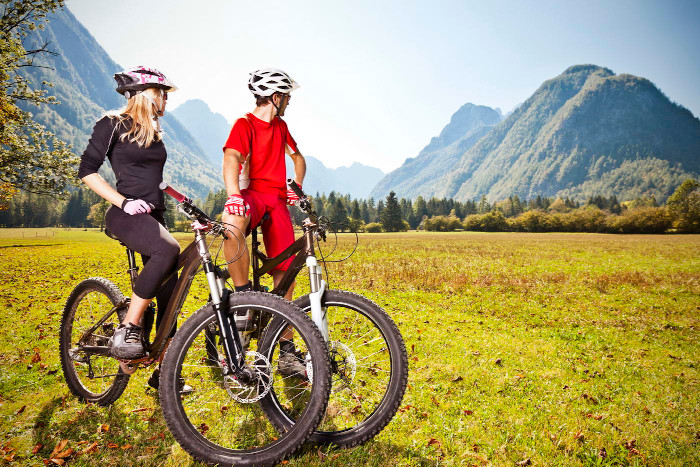

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; весна, 2 &mdash; лето, 3 &mdash; осень, 4 &mdash; зима;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [324]:
# Загрузим данные
data = pd.read_csv('day.csv')
data = data.reindex(columns=['season', 'mnth', 'holiday', 
                             'weekday', 'workingday', 'weathersit', 
                             'temp', 'atemp', 'hum', 
                             'windspeed', 'cnt'])
data.head(10)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
5,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606
6,1,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510
7,1,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
8,1,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,822
9,1,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,1321


In [325]:
# Разделим данные
train, test = train_test_split(data, test_size=0.2)
train.shape, test.shape

((584, 11), (147, 11))

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. 

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

In [326]:
# Выделим категории признаков:

# Категориальные признаки
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Вещественные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed'] 

# Целевой признак
target_feature = ['cnt']

print(len(categorial_features) + len(real_features) + len(target_feature))

11


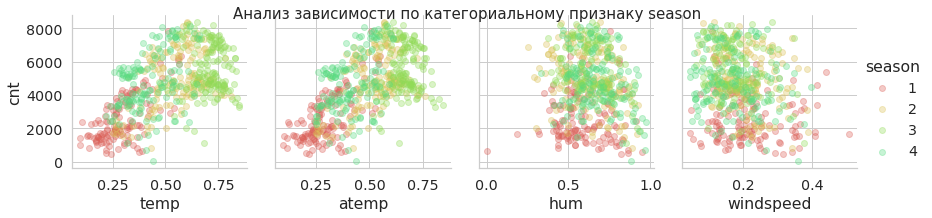

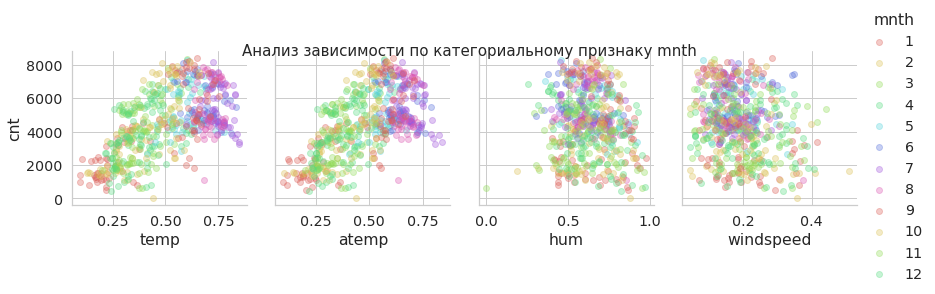

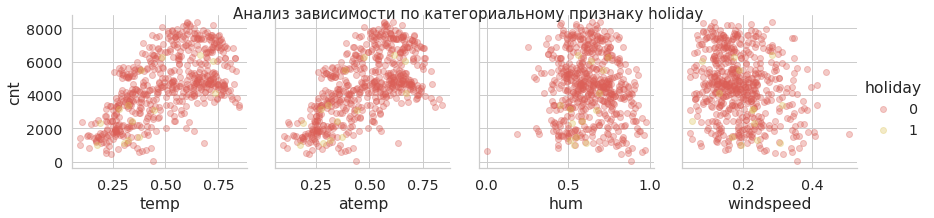

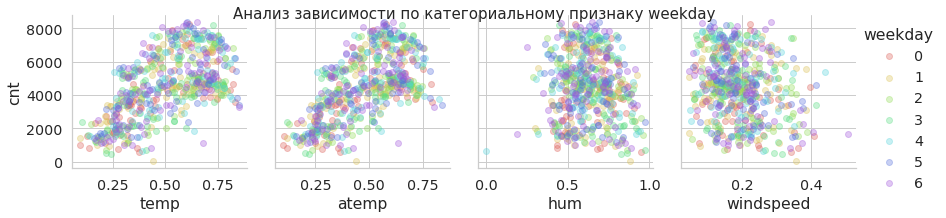

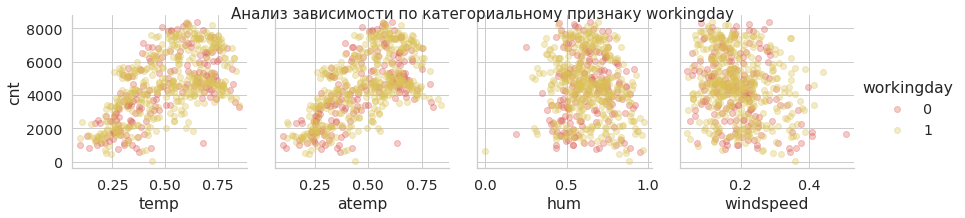

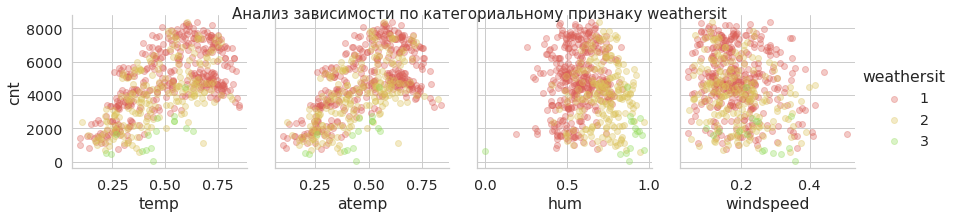

In [327]:
for hue in categorial_features:
    g = sns.PairGrid(train, hue=hue, diag_sharey=False, 
                     height=3, x_vars=real_features, 
                     y_vars=target_feature, palette=sns.color_palette("hls", 8))
    
    g.fig.suptitle("Анализ зависимости по категориальному признаку " + str(hue), fontsize=15)
    g.map(plt.scatter, alpha=0.33)
    g.add_legend()

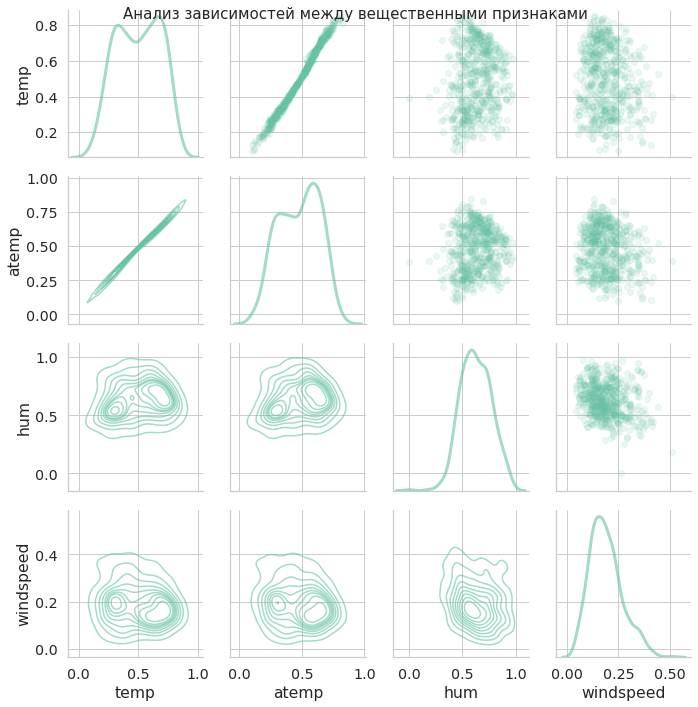

In [328]:
g = sns.PairGrid(train[real_features], 
                 diag_sharey=False)
g.fig.suptitle("Анализ зависимостей между вещественными признаками", fontsize=15);
g.map_lower(sns.kdeplot, alpha=0.6)
g.map_upper(plt.scatter, alpha=0.12)
g.map_diag(sns.kdeplot, lw=3, alpha=0.6, common_norm=False)

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



##### Вывод (по графикам):
    Видно, что вещественные признаки atemp и temp зависимы. Также видны и другие, но менее сильные зависимости между признаками. Можно увидеть присутствие явных выбросов. Нелинейные функции от признаков рассматривать не стоит, в большинстве случаев по графику зависимость линейная. 

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

**1.** Сделаем признаки независимыми, для этого удалим некоторые из них.

**2.** Уберем выбросы.

**3.** Закодируем категориальные признаки с помощью класса `OneHotEncoder`. 

Реализуйте данную процедуру.

In [329]:
def calculate(data):
    # Преобразуем категориальные признаки (исходя из графиков)
    categorial_features = ['season', 'weathersit', 'workingday']

    # Уберем зависимые признаки (исходя из графиков)
    real_features = ['temp', 'windspeed']

    target_feature = ['cnt']
    
    # Удалим выбросы
    data_copy = copy.deepcopy(data)
    data_copy = data_copy[(np.abs(stats.zscore(data_copy[real_features])) < 2.5).all(axis=1)]
    
    # Объявляем модель
    global encoder
    encoder = OneHotEncoder(drop='first', sparse=False) 
    
    # Обучаем и кодируем
    data_copy_cat = encoder.fit_transform(data_copy[categorial_features])
    
    # Соединим вместе вещественные признаки и закодированные категориальные
    X_data_copy = np.hstack([data_copy[real_features], data_copy_cat])
    
    return X_data_copy, np.array(data_copy[target_feature])

# Воспользуемся функцией
data_train, target_train = calculate(train)

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов.

In [330]:
# Объявляем модель
model = LinearRegression(fit_intercept=True) 

# Обучаем
model.fit(data_train, target_train)

print(model.coef_)
print(model.intercept_)

[[ 5226.6342556  -2433.96121958  1081.78868969   713.77973446
   1527.76019199  -669.25714505 -2962.41412559   209.49431302]]
[1704.31607121]


Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [331]:
title_array = ["RMSE", "MAE", "MAPE"]

def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

def measure_print(target, train_preds):
    print(title_array[0] + " " + str(metrics.mean_squared_error(target, train_preds) ** 0.5))
    print(title_array[1] + " " + str(metrics.mean_absolute_error(target, train_preds)))
    print(title_array[2] + " " + str(mean_absolute_percentage_error(target, train_preds)))

print("На обучающих данных:")
train_preds = model.predict(data_train)
measure_print(target_train, train_preds)
    
print("\nНа тестовых данных:")
data_test, target_test = calculate(test)
train_preds = model.predict(data_test)
measure_print(target_test, train_preds)

На обучающих данных:
RMSE 1336.333360904382
MAE 1148.3094415078874
MAPE 47.35572783132416

На тестовых данных:
RMSE 1250.8893951797559
MAE 1075.6487652384878
MAPE 32.15666260571155


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [332]:
coeff = np.linalg.inv(data_train.T.dot(data_train)).dot(data_train.T).dot(target_train)
coeff_preds = data_test.dot(coeff)
measure_print(target_test, coeff_preds)

RMSE 1265.5870246133798
MAE 1061.4886073822208
MAPE 28.876359273802194


Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

##### Комментарий:
    Зависимые признаки уже убраны, добавим обратно и посмотрим, что будет.

In [333]:
def bad_calculate(data):
    # Преобразуем категориальные признаки (исходя из графиков)
    categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

    # Уберем зависимые признаки (исходя из графиков)
    real_features = ['temp', 'atemp', 'hum', 'windspeed']

    target_feature = ['cnt']
    
    # Удалим выбросы
    data_copy = copy.deepcopy(data)
    data_copy = data_copy[(np.abs(stats.zscore(data_copy[real_features])) < 2.5).all(axis=1)]
    
    # Объявляем модель
    global encoder 
    encoder = OneHotEncoder(drop='first', sparse=False) 
    
    # Обучаем и кодируем
    data_copy_cat = encoder.fit_transform(data_copy[categorial_features])
    
    # Соединим вместе вещественные признаки и закодированные категориальные
    X_data_copy = np.hstack([data_copy[real_features], data_copy_cat])
    
    return X_data_copy, np.array(data_copy[target_feature])

# Воспользуемся функцией
data_train, target_train = bad_calculate(train)
data_test, target_test = bad_calculate(test)

coeff = np.linalg.inv(data_train.T.dot(data_train)).dot(data_train.T).dot(target_train)
coeff_preds = data_test.dot(coeff)
measure_print(target_test, coeff_preds)

RMSE 127270.82393495424
MAE 62438.93067460364
MAPE 2010.1099909929058


Сделайте выводы.

##### Выводы:
    Видно, что если есть зависимые признаки, то качество резко падает. Важно правильно выбирать признаки, оставляя все необходимые, но исключая зависимости. Такое падение качества можно объяснить тем, что в формуле, выведенной на лекции, detA будет достаточно близок к 0.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как получается батч.

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

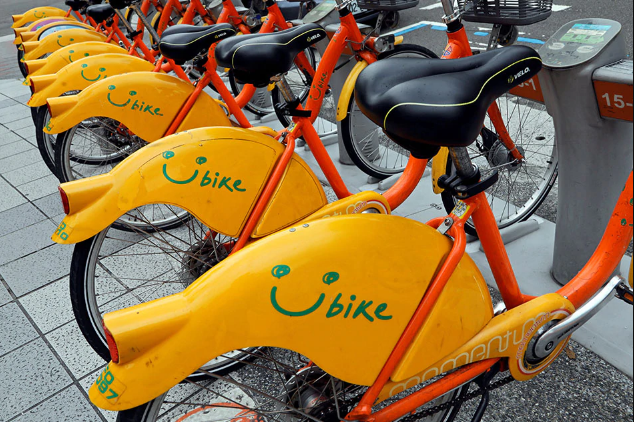

Для начала реализуйте класс для работы с моделью ridge-регрессии. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [334]:
def form(X, Y, D, L):
    return np.linalg.inv(X.T.dot(X) + L * np.identity(D)).dot(X.T).dot(Y)

class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        
        
    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        # Посчитайте оценки коэффициентов и, возможно, 
        # еще что-то, что пригодится в predict.
        if (self.fit_intercept):
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        N, D = X.shape
        self.coefs = form(X, Y, D, self.lambd)
        return self
    
    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        
        # Посчитайте предсказания
        if (self.fit_intercept):
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        return X.dot(self.coefs.T)

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

In [335]:
train, test = train_test_split(data, test_size=0.4)
test, validate = train_test_split(test, test_size=0.5) 

print("train shape: " + str(train.shape))
print("validate shape: " + str(validate.shape))
print("test shape: " + str(test.shape))

train shape: (438, 11)
validate shape: (147, 11)
test shape: (146, 11)


Выполните необходимые преобразования признаков. Не забудьте, что обучить преобразования нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее.

In [336]:
def calculate(data):
    # Преобразуем категориальные признаки (исходя из графиков)
    categorial_features = ['season', 'weathersit', 'workingday']

    # Уберем зависимые признаки (исходя из графиков)
    real_features = ['temp', 'windspeed']

    target_feature = ['cnt']
    
    # Удалим выбросы
    data_copy = copy.deepcopy(data)
    data_copy = data_copy[(np.abs(stats.zscore(data_copy[real_features])) < 2.5).all(axis=1)]
    
    # Объявляем модель
    global encoder 
    encoder = OneHotEncoder(drop='first', sparse=False) 
    
    # Обучаем и кодируем
    data_copy_cat = encoder.fit_transform(data_copy[categorial_features])
    
    # Соединим вместе вещественные признаки и закодированные категориальные
    X_data_copy = np.hstack([data_copy[real_features], data_copy_cat])
    
    return X_data_copy, np.array(data_copy[target_feature[0]])

# Воспользуемся функцией
data_train, target_train = calculate(train)
data_validate, target_validate = calculate(validate)
data_test, target_test = calculate(test)

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе.

In [337]:
lambda_range = np.logspace(-2, 2, num=200)
model_array = []
for value in lambda_range:
    new_model = RidgeRegression(lambd=value)
    new_model.fit(data_train, target_train)
    model_array.append(new_model)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. 

In [338]:
def rates(array_of_models, data, target):
    rmse = []; mae = []; mape = [];
    for model in array_of_models:
        preds = model.predict(data)
        mape.append(mean_absolute_percentage_error(target, preds))
        rmse.append(metrics.mean_squared_error(target, preds) ** 0.5)
        mae.append(metrics.mean_absolute_error(target, preds))
    return rmse, mae, mape

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

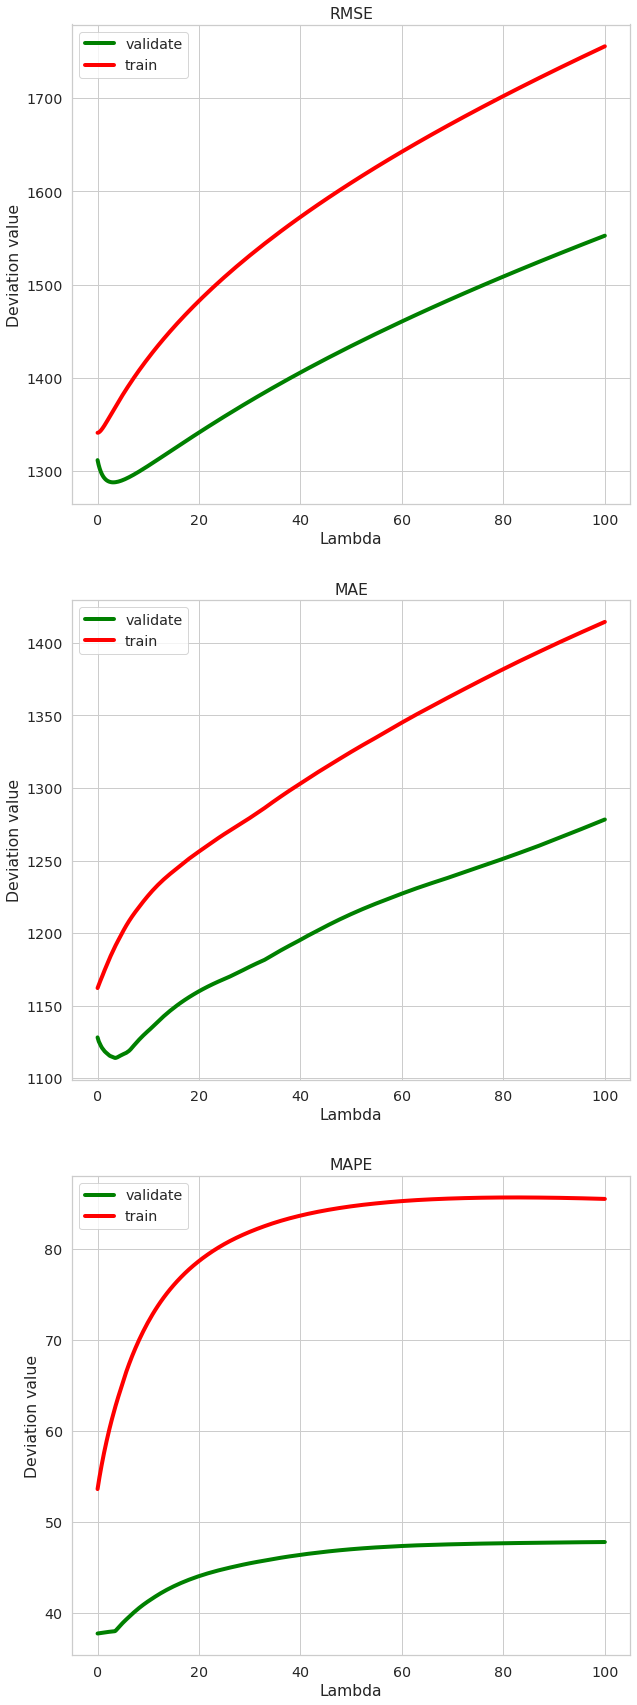

In [339]:
# Рисуем график
def plot_template_(rmse, mae, mape, lambda_range, name, color_):
    array_of_values_e = [rmse, mae, mape]
    for i in range(len(title_array)):
        # draw
        ax = plt.subplot(3, 1, i + 1)
        ax.plot(lambda_range, array_of_values_e[i], label=name, color=color_, lw=4)
        
        # title
        ax.set_title(title_array[i])
        ax.legend(loc=2)
        ax.set_xlabel("Lambda")
        ax.set_ylabel("Deviation value")

# Размер графика
fig = plt.figure(figsize=(10, 30))

# Используем функцию
plot_template_(*rates(model_array, data_validate, target_validate), lambda_range, "validate", "g") 
plot_template_(*rates(model_array, data_train, target_train), lambda_range, "train", "r")

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Для наглядности можно попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

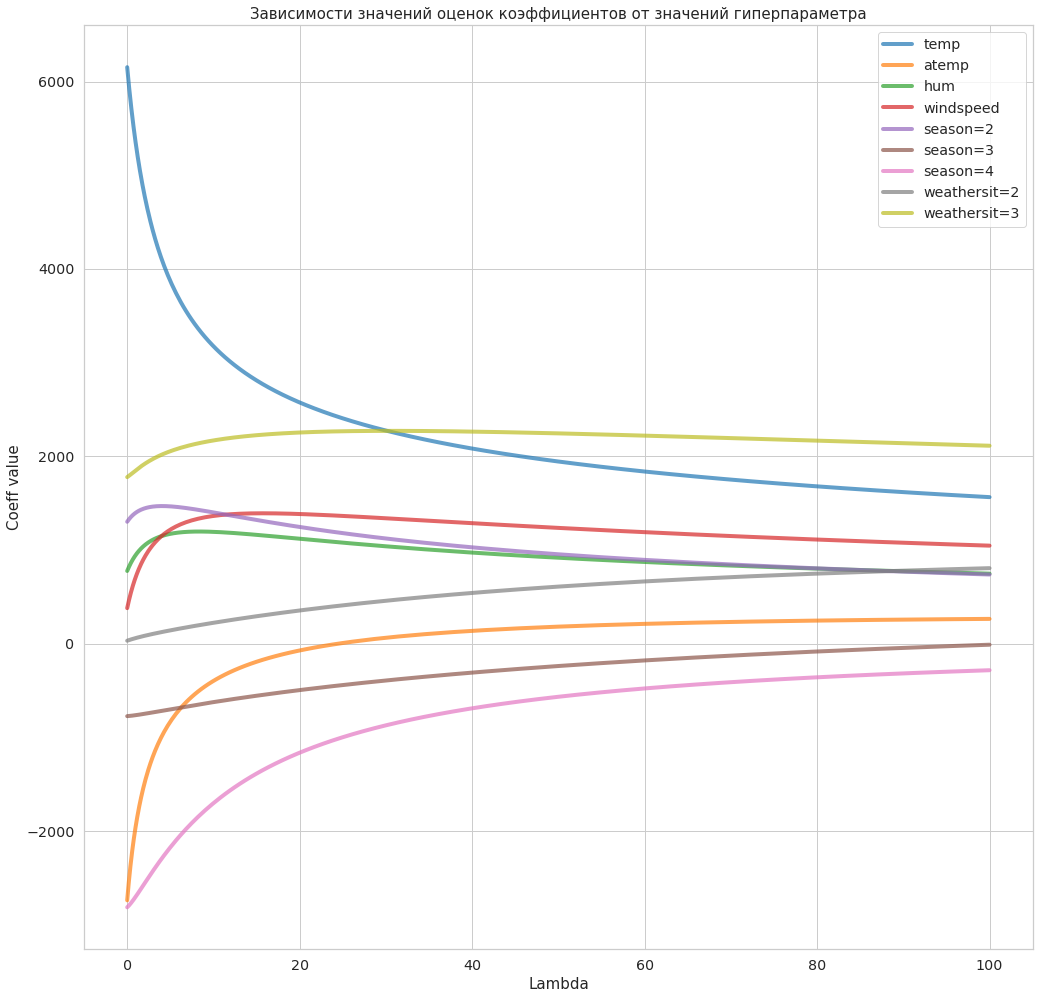

In [340]:
# new palette
color_ = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# coeff
coeff_array = np.array([it.coefs for it in model_array]).T

# plot main items
figure, axes = plt.subplots(figsize=(17, 17))

# encoder used last time

# name
name = copy.deepcopy(real_features)
for LARR, TIT in zip(encoder.categories_, encoder.feature_names_in_):
    for x in LARR[1:]:
        name += [(str(TIT) + "=" + str(x))]

# plots
for index_, p_ in enumerate(coeff_array):
    axes.plot(lambda_range, p_, label=name[index_], lw=4, alpha=0.7, color=color_[index_])

# labels
axes.legend(loc=1)
axes.set_title("Зависимости значений оценок коэффициентов от значений гиперпараметра", fontsize=15)
axes.set_xlabel("Lambda", fontsize=15)
axes.set_ylabel("Coeff value", fontsize=15);

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

##### Комментарий:
    Выберем 19.

In [341]:
# Regresssion
current = RidgeRegression(lambd=19)
current.fit(data_train, target_train)
current.coefs = current.coefs.T

# Rates
array_of_rates = rates([current], data_test, target_test)

# Print
for index_ in range(0, 3):
    print(title_array[index_] + " " + str(array_of_rates[index_][0]))

RMSE 1330.1252653243675
MAE 1118.9482851757323
MAPE 34.813621447466105


Сделайте выводы.

##### Вывод:
    Рост lambda ведет к стабилизации коеффициентов оценки. Они стабилизируются в отрезок [~0, 2000]. Коеффициент temp при маленьких lambda (от 0 до 20) имеет гиперболический график, как и другие, но он наиболее резко мнеяет значение.

### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

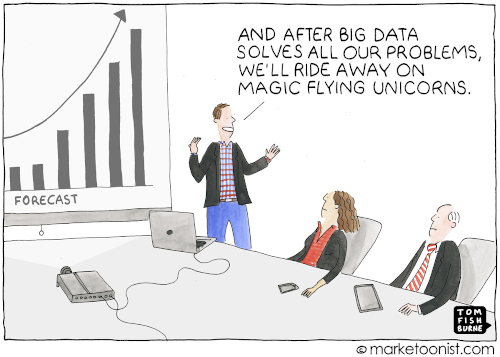

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

Реализуйте процедуру mini-batch стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча обычно берут кратно степени двойки, например, 128 или 256.

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.